In [1]:
# WoodsPoint EQ data rpocessing for the records from SRC/UoM network

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
from obspy import read, read_inventory
from obspy.geodetics import locations2degrees
from obspy.geodetics import gps2dist_azimuth
from obspy.geodetics import degrees2kilometers
from obspy import read, read_inventory

c = Client("IRIS")

st = obspy.read("C:\\Users\gideo\MyOwn\Obspy\WoodsPointEQ\Inventory\ForgeneratingPAZfiles\RawDataAdam\FRTM.ms")

inv = read_inventory("C:\\Users\gideo\MyOwn\Obspy\WoodsPointEQ\Inventory\ForgeneratingPAZfiles\stationxmlSRC\FRTM.xml")

st.detrend("linear")
print(st)

# print(inv)


3 Trace(s) in Stream:
AB.FRTM.60.HHE | 2021-09-21T23:15:54.875128Z - 2021-09-21T23:17:40.985128Z | 100.0 Hz, 10612 samples
AB.FRTM.60.HHN | 2021-09-21T23:15:54.875128Z - 2021-09-21T23:17:40.985128Z | 100.0 Hz, 10612 samples
AB.FRTM.60.HHZ | 2021-09-21T23:15:54.875128Z - 2021-09-21T23:17:40.985128Z | 100.0 Hz, 10612 samples


AB.FRTM.60.HHZ | 2021-09-21T23:15:54.875128Z - 2021-09-21T23:17:40.985128Z | 100.0 Hz, 10612 samples

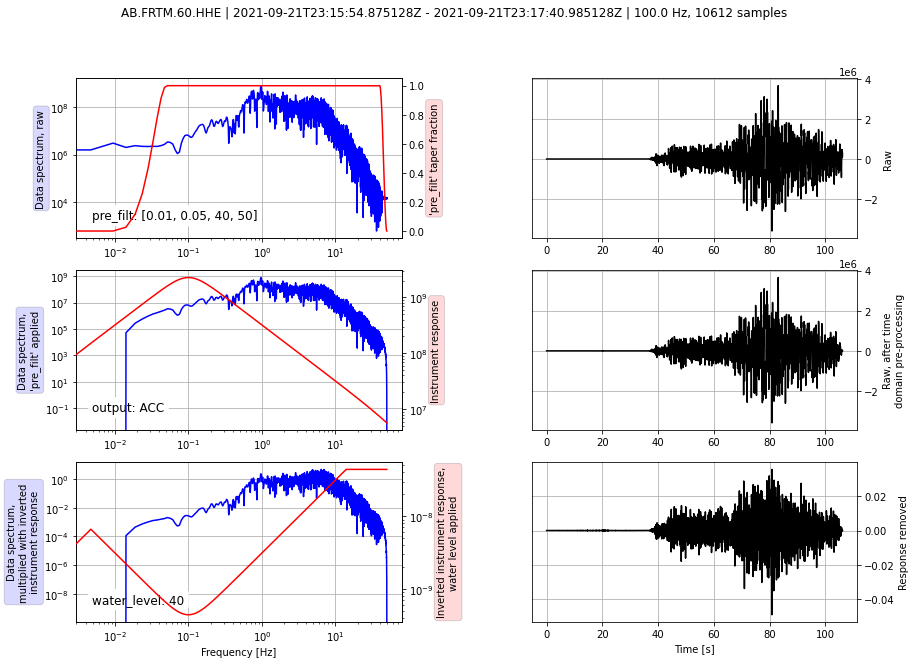

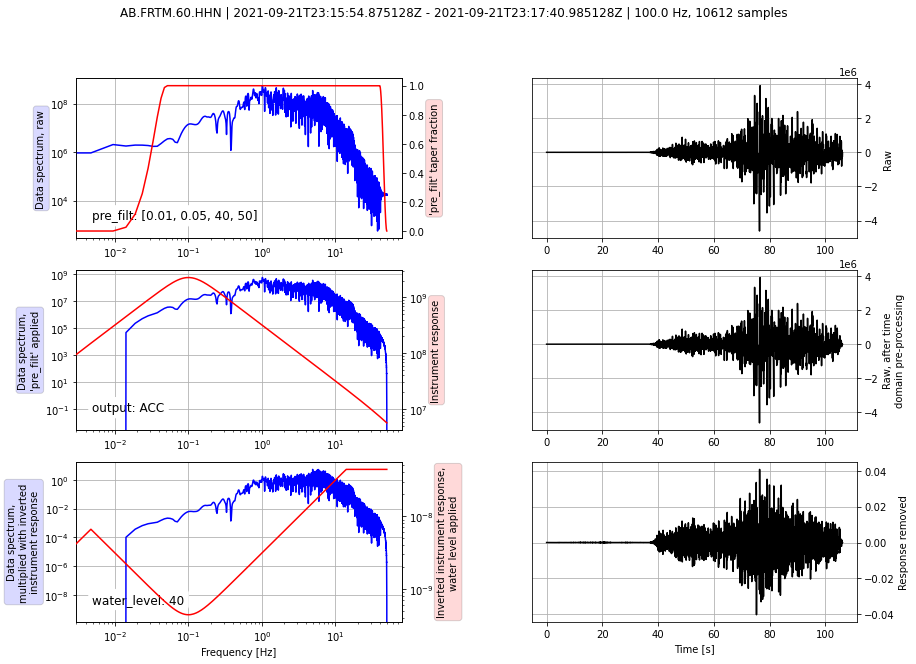

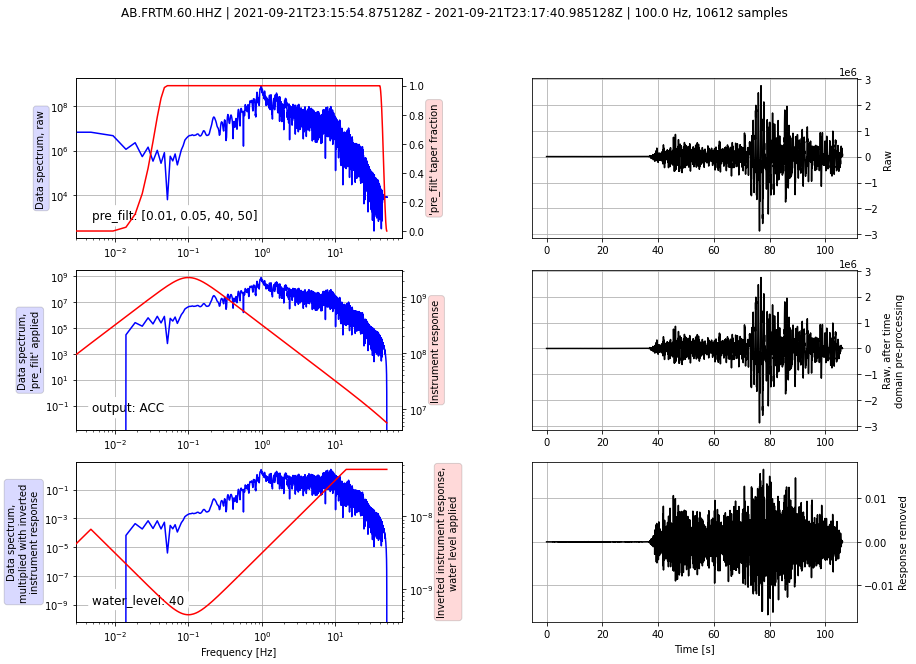

In [2]:
stnm       = 'FRTM'

chan1      = 'HHE'
chan2      = 'HHN'
chan3      = 'HHZ'

# chan1      = 'CHE'
# chan2      = 'CHN'
# chan3      = 'CHZ'

# chan1      = 'DHE'
# chan2      = 'DHN'
# chan3      = 'DHZ'

# chan1      = 'HNE'
# chan2      = 'HNN'
# chan3      = 'HNZ'

# chan1      = 'DNE'
# chan2      = 'DNN'
# chan3      = 'DNZ'



tr1  = st[0]
tr2  = st[1]
tr3  = st[2]

# tr1  = st[3]
# tr2  = st[4]
# tr3  = st[5]

tr0 = tr1.copy()    # make a copy for comparison

# remove response for 3 components

freq1=0.4*tr1.stats.sampling_rate  # high frequency limit
freq2=0.5*tr1.stats.sampling_rate  # Nyquist frequency
pre_filt=[0.01, 0.05, freq1, freq2]

tr1.remove_response(inventory=inv, output="ACC", water_level=40, plot=True, pre_filt=pre_filt, 
                   zero_mean=True,taper=True, taper_fraction=0.05)


tr2.remove_response(inventory=inv, output="ACC", water_level=40, plot=True, pre_filt=pre_filt, 
                   zero_mean=True,taper=True, taper_fraction=0.05)


tr3.remove_response(inventory=inv, output="ACC", water_level=40, plot=True, pre_filt=pre_filt, 
                   zero_mean=True,taper=True, taper_fraction=0.05)



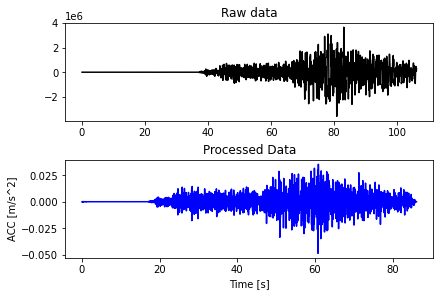

In [3]:
# cut out the part of no interest

t1 = tr1.stats.starttime + 20
t2 = t1 + 130
tr1.trim(t1, t2)
tr2.trim(t1, t2)
tr3.trim(t1, t2)

tr1.filter("bandpass", freqmin=0.01, freqmax=freq1, zerophase=True) 
tr1.detrend("demean")
tr1.detrend("linear")

tr2.filter("bandpass", freqmin=0.01, freqmax=freq1, zerophase=True) 
tr2.detrend("demean")
tr2.detrend("linear")

tr3.filter("bandpass", freqmin=0.01, freqmax=freq1, zerophase=True) 
tr3.detrend("demean")
tr3.detrend("linear")


# illustration

figure, ax = plt.subplots(2,1, constrained_layout=True)

t0 = np.arange(tr0.stats.npts) / tr0.stats.sampling_rate
t = np.arange(tr1.stats.npts) / tr1.stats.sampling_rate

ax[0].plot(t0, tr0.data, 'k')
plt.xlabel('Time [s]')
plt.ylabel('Counts')

ax[1].plot(t, tr1.data, 'b')
plt.xlabel('Time [s]')
plt.ylabel('ACC [m/s^2]')

ax[0].set_title("Raw data")
ax[1].set_title("Processed Data")

plt.show()

In [4]:
outfile1 = (stnm + '_' + chan1 + '.sac')
outfile2 = (stnm + '_' + chan2 + '.sac')
outfile3 = (stnm + '_' + chan3 + '.sac')
tr1.write(outfile1, format="sac")
tr2.write(outfile2, format="sac")
tr3.write(outfile3, format="sac")
outfilecsv = (stnm + '.csv')

# np.savetxt(outfilecsv, np.transpose([t, tr1, tr2, tr3]),fmt='%.3g')
np.savetxt(outfilecsv, np.transpose([t, tr1, tr2, tr3]), fmt='%.5g')

In [5]:
# t3 = np.arange(tr3.stats.npts) / tr3.stats.sampling_rate
# np.savetxt(outfilecsv, np.transpose([t3, tr3]), fmt='%.5g')